In [56]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()

In [57]:
df_cost= pd.read_excel(r'C:\Users\Documents\Stepstone Case\df_cost.xlsx')
df_inventory= pd.read_excel(r'C:\Users\Documents\Stepstone Case\df_inventory.xlsx')
df_sales= pd.read_excel(r'C:\Users\Documents\Stepstone Case\df_sales.xlsx')

In [58]:
df_cost.head()

,ID,Monthh,Product_Type,Worktype,SEA_cost,Partner_cost,Retargeting_cost
0,17503672,2019-01-01,INDIVIDUAL,F,33.511994,3.956446,2.047375
1,17503769,2019-01-01,INDIVIDUAL,F,52.621056,7.435564,0.000000
2,17503752,2019-01-01,INDIVIDUAL,F,25.442996,0.000000,0.000000
3,17503764,2019-01-01,INDIVIDUAL,F,203.266268,23.336604,0.000000
4,17503764,2019-02-01,INDIVIDUAL,F,82.433601,28.882097,0.000000


In [59]:
df_cost['Product_Type'].unique()

array(['INDIVIDUAL', 'TRAINEE_INDI', 'STANDARD', nan, 'TRAINEE_STD',
       'PLUS'], dtype=object)

In [60]:
df_cost['Worktype'].unique()

array(['F', 'P', 'F; P', nan], dtype=object)

In [61]:
df_sales.head()

,ID,Product_Duration,Joblocation,contr_owner_bl,Monthh,company_name,company_id,sales
0,16106151,360,Mannheim,Staffing Agency,2019-01-01,Legros and Sons,100001,1125.270191
1,16106287,360,Hamburg,Staffing Agency,2019-01-01,Legros and Sons,100001,1300.307575
2,16106459,360,Friedrichshafen,Staffing Agency,2019-01-01,Legros and Sons,100001,1365.846221
3,16109128,30,Gütersloh,Media Agency,2019-01-01,Lang Inc,100002,490.491506
4,16116800,30,Köln,Staffing Agency,2019-02-01,"Leffler, Schiller and Howell",100000,316.201454


In [78]:
df_inventory.head()

,ID,Discipline_EN,Discipline_DE,Subdiscipline_EN,Subdiscipline_DE,DaysOnline,applications
0,16501418,Marketing,Marketing,Marketing,Marketing,30,15
1,16691111,Health,Gesundheit,Nursing,Pflegepersonal,61,27
2,16691111,Health,Gesundheit,Management,Management,61,26
3,16691111,Social Care,Soziales,Caring,"Pflege, Betreung",61,22
4,16813245,IT,IT,Management,Management,30,30


In [62]:
df_sales['sales']= round(df_sales['sales'],2)

In [63]:
sales = pd.DataFrame(df_sales.groupby(['Monthh'])['sales'].sum()).reset_index()
sales

,Monthh,sales
0,2019-01-01,11494313.26
1,2019-02-01,10932583.05
2,2019-03-01,10932015.22
3,2019-04-01,10885131.96
4,2019-05-01,11267713.92
5,2019-06-01,9351171.74
6,2019-07-01,11099113.13
7,2019-08-01,9991362.29
8,2019-09-01,9389448.89
9,2019-10-01,10075505.21


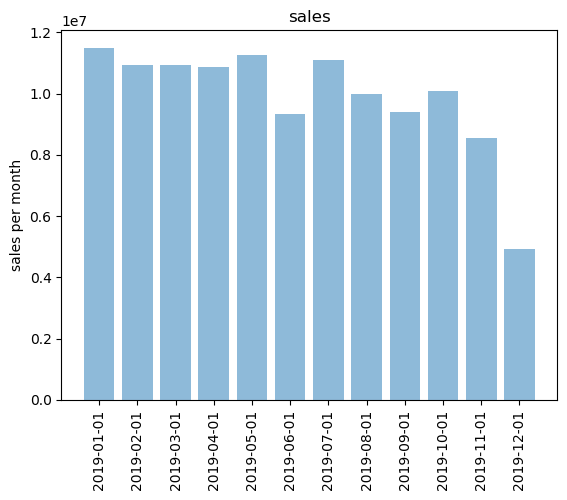

In [64]:
mnth = sales['Monthh']
y_pos = np.arange(len(mnth))
hits = sales['sales']

plt.bar(y_pos, hits, align='center', alpha=0.5)
plt.xticks(y_pos, mnth)
plt.xticks(rotation=90)
plt.ylabel('sales per month')
plt.title('sales')

plt.show()

In [65]:
jobs = pd.DataFrame(df_sales.groupby(['Monthh'])['ID'].count()).reset_index()
jobs

,Monthh,ID
0,2019-01-01,7686
1,2019-02-01,7158
2,2019-03-01,7083
3,2019-04-01,6962
4,2019-05-01,7193
5,2019-06-01,6136
6,2019-07-01,7314
7,2019-08-01,6610
8,2019-09-01,6167
9,2019-10-01,6684


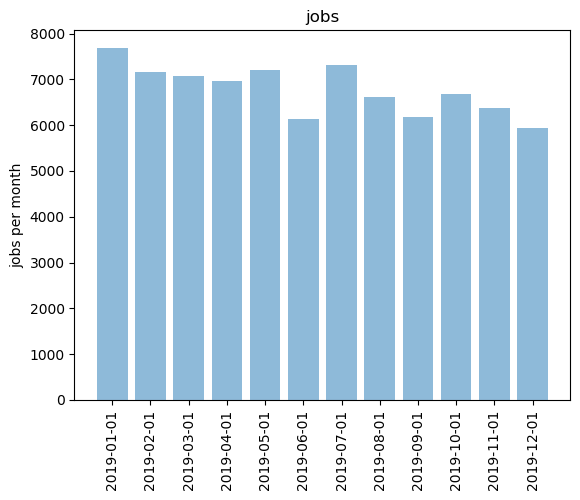

In [66]:
mnth = jobs['Monthh']
y_pos = np.arange(len(mnth))
hits = jobs['ID']

plt.bar(y_pos, hits, align='center', alpha=0.5)
plt.xticks(y_pos, mnth)
plt.xticks(rotation=90)
plt.ylabel('jobs per month')
plt.title('jobs')

plt.show()

In [67]:
custtype = pd.DataFrame(df_sales.groupby(['contr_owner_bl'])['sales'].sum()).reset_index()
custtype

,contr_owner_bl,sales
0,Key Account,12514309.56
1,Large Recruiter,16441088.47
2,Media Agency,49268529.97
3,S/M Recruiter,31893429.48
4,Staffing Agency,8788841.72


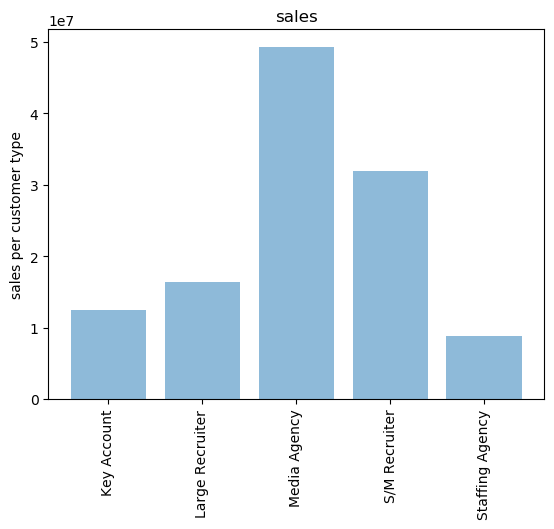

In [68]:
cst = custtype['contr_owner_bl']
y_pos = np.arange(len(cst))
hits = custtype['sales']

plt.bar(y_pos, hits, align='center', alpha=0.5)
plt.xticks(y_pos, cst)
plt.xticks(rotation=90)
plt.ylabel('sales per customer type')
plt.title('sales')

plt.show()

In [69]:
duration = pd.DataFrame(df_sales.groupby(['Product_Duration'])['sales'].sum()).reset_index()
duration

,Product_Duration,sales
0,30,80415381.42
1,60,27218619.42
2,90,6914825.15
3,360,4357373.21


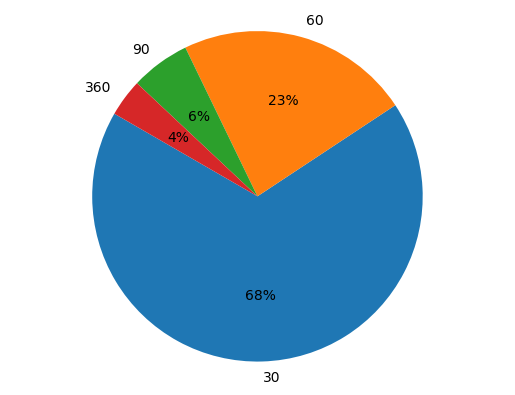

In [70]:

labels = duration['Product_Duration']
counts = duration['sales']

# Plot
plt.pie(counts,  labels=labels,
autopct='%1.0f%%', shadow=False, startangle=150)

plt.axis('equal')
plt.show()

In [71]:
costs = pd.DataFrame(df_cost.groupby(['Monthh'])['SEA_cost', 'Partner_cost', 'Retargeting_cost'].sum()).reset_index()
costs

,Monthh,SEA_cost,Partner_cost,Retargeting_cost
0,2019-01-01,502941.864338,238875.433150,137548.323258
1,2019-02-01,914756.375072,394349.328421,162514.438329
2,2019-03-01,902309.289706,449431.587014,184565.381756
3,2019-04-01,832817.931696,387664.805296,170625.515950
4,2019-05-01,819107.530074,405672.325984,203742.958573
5,2019-06-01,796763.133991,359111.787977,173857.395130
6,2019-07-01,895736.754805,432756.570658,177058.932475
7,2019-08-01,845285.679725,433021.952880,147789.447104
8,2019-09-01,622577.007145,448854.187251,128158.477130
9,2019-10-01,342537.170686,492241.403870,122047.494295


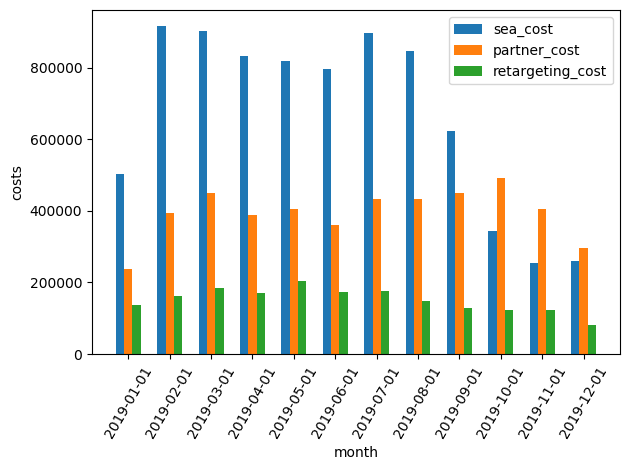

In [72]:
fig, ax = plt.subplots()
index = np.arange(len(costs))
bar_width = 0.2
opacity = 10

v1 = plt.bar(index, costs['SEA_cost'], bar_width,
label='sea_cost')

v2 = plt.bar(index + bar_width, costs['Partner_cost'], bar_width,
label='partner_cost')

v3 = plt.bar(index + bar_width + bar_width, costs['Retargeting_cost'], bar_width,
label='retargeting_cost')

plt.xlabel('month')
plt.ylabel('costs')
#plt.title('title')
plt.xticks(index + bar_width, costs['Monthh'])
plt.xticks(rotation=60)
plt.legend()

plt.tight_layout()
plt.show()

In [73]:
df_sales['contr_owner_bl'].unique()

array(['Staffing Agency', 'Media Agency', 'S/M Recruiter', 'Key Account',
       'Large Recruiter'], dtype=object)

In [74]:
df_inventory.head()

,ID,Discipline_EN,Discipline_DE,Subdiscipline_EN,Subdiscipline_DE,DaysOnline,applications
0,16501418,Marketing,Marketing,Marketing,Marketing,30,15
1,16691111,Health,Gesundheit,Nursing,Pflegepersonal,61,27
2,16691111,Health,Gesundheit,Management,Management,61,26
3,16691111,Social Care,Soziales,Caring,"Pflege, Betreung",61,22
4,16813245,IT,IT,Management,Management,30,30


In [75]:
df_cost['Total_cost']= df_cost['SEA_cost']+ df_cost['Partner_cost']+ df_cost['Retargeting_cost']
df_cost.head()

,ID,Monthh,Product_Type,Worktype,SEA_cost,Partner_cost,Retargeting_cost,Total_cost
0,17503672,2019-01-01,INDIVIDUAL,F,33.511994,3.956446,2.047375,39.515815
1,17503769,2019-01-01,INDIVIDUAL,F,52.621056,7.435564,0.000000,60.056620
2,17503752,2019-01-01,INDIVIDUAL,F,25.442996,0.000000,0.000000,25.442996
3,17503764,2019-01-01,INDIVIDUAL,F,203.266268,23.336604,0.000000,226.602872
4,17503764,2019-02-01,INDIVIDUAL,F,82.433601,28.882097,0.000000,111.315698


In [76]:
df = pd.merge(df_cost, df_sales, how='outer', on=['ID', 'Monthh'])

In [77]:
df.fillna(0, inplace=True)
df.head()

,ID,Monthh,Product_Type,Worktype,SEA_cost,Partner_cost,Retargeting_cost,Total_cost,Product_Duration,Joblocation,contr_owner_bl,company_name,company_id,sales
0,17503672,2019-01-01,INDIVIDUAL,F,33.511994,3.956446,2.047375,39.515815,30.0,Koblenz,Staffing Agency,Legros and Sons,100001.0,729.33
1,17503769,2019-01-01,INDIVIDUAL,F,52.621056,7.435564,0.000000,60.056620,30.0,Stuttgart,Key Account,Corwin-Zemlak,103079.0,2461.77
2,17503752,2019-01-01,INDIVIDUAL,F,25.442996,0.000000,0.000000,25.442996,30.0,Berlin,Key Account,Corwin-Zemlak,103079.0,3191.94
3,17503764,2019-01-01,INDIVIDUAL,F,203.266268,23.336604,0.000000,226.602872,30.0,Köln,Key Account,Corwin-Zemlak,103079.0,3549.56
4,17503764,2019-02-01,INDIVIDUAL,F,82.433601,28.882097,0.000000,111.315698,0.0,0,0,0,0.0,0.00


In [84]:
costs2 = pd.DataFrame(df.groupby(['contr_owner_bl'])['SEA_cost', 'Partner_cost', 'Retargeting_cost'].sum()).reset_index()
costs2['contr_owner_bl']=costs2['contr_owner_bl'].astype(str)
costs2

,contr_owner_bl,SEA_cost,Partner_cost,Retargeting_cost
0,0,4.497981e+06,2.582408e+06,824595.585187
1,Key Account,5.753296e+05,2.342865e+05,127388.745382
2,Large Recruiter,4.677707e+05,2.755803e+05,123092.583064
3,Media Agency,1.539787e+06,9.743970e+05,468010.946841
4,S/M Recruiter,6.696509e+05,5.037684e+05,198912.207689
5,Staffing Agency,2.394589e+05,1.748160e+05,70773.808294


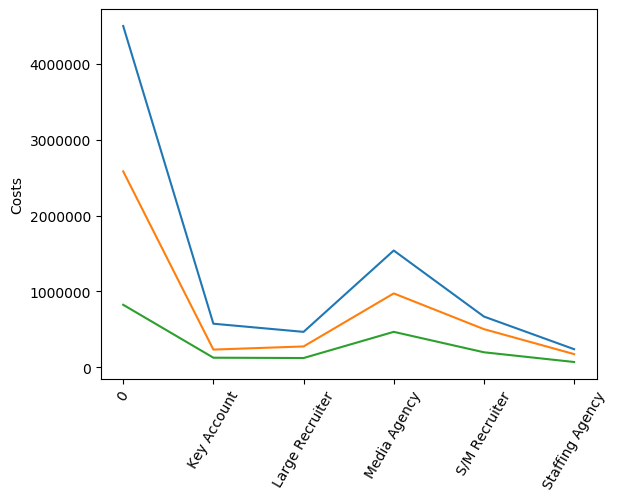

In [90]:
x = costs2['contr_owner_bl']
y = costs2['SEA_cost'] 
z= costs2['Partner_cost']
t= costs2['Retargeting_cost']
plt.plot(x, y)
plt.plot(x, z)
plt.plot(x, t)
#plt.xlabel('Customer type')
plt.ylabel('Costs')
#plt.title('Costs per customer type')
plt.xticks(rotation=60)
plt.show()

In [94]:
costs3 = pd.DataFrame(df.groupby(['Product_Duration'])['SEA_cost', 'Partner_cost', 'Retargeting_cost'].sum()).reset_index()
costs3['Product_Duration']=costs3['Product_Duration'].astype(str)
costs3

,Product_Duration,SEA_cost,Partner_cost,Retargeting_cost
0,0.0,4.497981e+06,2.582408e+06,824595.585187
1,30.0,2.544045e+06,1.580756e+06,686246.599284
2,60.0,7.152325e+05,4.249707e+05,223244.576748
3,90.0,1.401386e+05,1.000356e+05,52691.410214
4,360.0,9.258115e+04,5.708626e+04,25995.705024


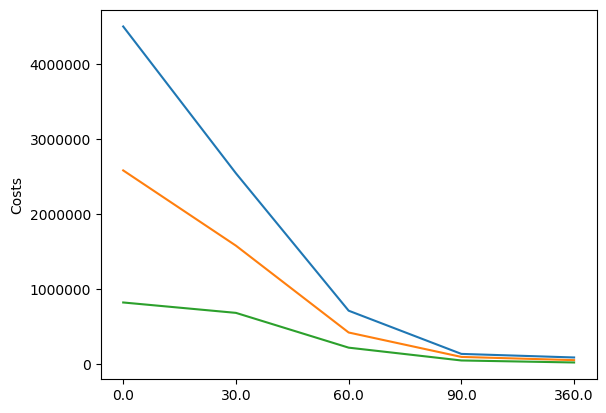

In [96]:
x = costs3['Product_Duration']
y = costs3['SEA_cost'] 
z= costs3['Partner_cost']
t= costs3['Retargeting_cost']
plt.plot(x, y)
plt.plot(x, z)
plt.plot(x, t)
#plt.xlabel('Customer type')
plt.ylabel('Costs')
#plt.title('Costs per customer type')
#plt.xticks(rotation=60)
plt.show()

In [97]:
df= pd.merge(df, df_inventory, how='outer', on='ID')
df.fillna(0, inplace=True)
df.head()

,ID,Monthh,Product_Type,Worktype,SEA_cost,Partner_cost,Retargeting_cost,Total_cost,Product_Duration,Joblocation,contr_owner_bl,company_name,company_id,sales,Discipline_EN,Discipline_DE,Subdiscipline_EN,Subdiscipline_DE,DaysOnline,applications
0,17503672,2019-01-01,INDIVIDUAL,F,33.511994,3.956446,2.047375,39.515815,30.0,Koblenz,Staffing Agency,Legros and Sons,100001.0,729.33,Engineering,Ingenieurwesen,Design,Design,30.0,1.0
1,17503672,2019-02-01,INDIVIDUAL,F,11.593049,0.000000,0.000000,11.593049,0.0,0,0,0,0.0,0.00,Engineering,Ingenieurwesen,Design,Design,30.0,1.0
2,17503769,2019-01-01,INDIVIDUAL,F,52.621056,7.435564,0.000000,60.056620,30.0,Stuttgart,Key Account,Corwin-Zemlak,103079.0,2461.77,Customer Service,Kundenservice,Advising,Beratung,27.0,5.0
3,17503769,2019-02-01,INDIVIDUAL,F,5.713766,1.190462,0.000000,6.904227,0.0,0,0,0,0.0,0.00,Customer Service,Kundenservice,Advising,Beratung,27.0,5.0
4,17503752,2019-01-01,INDIVIDUAL,F,25.442996,0.000000,0.000000,25.442996,30.0,Berlin,Key Account,Corwin-Zemlak,103079.0,3191.94,Health,Gesundheit,Nursing,Pflegepersonal,6.0,0.0


In [108]:
duration3 = pd.DataFrame(df.groupby(['Product_Duration'])['sales', 'SEA_cost', 'Partner_cost', 'Retargeting_cost'].sum()).reset_index()
duration3

,Product_Duration,sales,SEA_cost,Partner_cost,Retargeting_cost
0,0.0,0.000000e+00,6.148084e+06,3.528334e+06,1.073415e+06
1,30.0,1.054208e+08,3.374968e+06,2.091523e+06,8.753026e+05
2,60.0,3.687079e+07,9.718043e+05,5.831381e+05,2.927244e+05
3,90.0,9.228516e+06,1.850439e+05,1.308931e+05,6.669163e+04
4,360.0,5.939710e+06,1.261185e+05,7.794169e+04,3.418741e+04


In [109]:
duration3['total_cost']=  duration3['SEA_cost']+ duration3['Partner_cost']+ duration3['Retargeting_cost']
duration3

,Product_Duration,sales,SEA_cost,Partner_cost,Retargeting_cost,total_cost
0,0.0,0.000000e+00,6.148084e+06,3.528334e+06,1.073415e+06,1.074983e+07
1,30.0,1.054208e+08,3.374968e+06,2.091523e+06,8.753026e+05,6.341794e+06
2,60.0,3.687079e+07,9.718043e+05,5.831381e+05,2.927244e+05,1.847667e+06
3,90.0,9.228516e+06,1.850439e+05,1.308931e+05,6.669163e+04,3.826286e+05
4,360.0,5.939710e+06,1.261185e+05,7.794169e+04,3.418741e+04,2.382476e+05


In [110]:
duration3['margin']= (duration3['sales']- duration3['total_cost'])/duration3['sales']
duration3

,Product_Duration,sales,SEA_cost,Partner_cost,Retargeting_cost,total_cost,margin
0,0.0,0.000000e+00,6.148084e+06,3.528334e+06,1.073415e+06,1.074983e+07,-inf
1,30.0,1.054208e+08,3.374968e+06,2.091523e+06,8.753026e+05,6.341794e+06,0.939843
2,60.0,3.687079e+07,9.718043e+05,5.831381e+05,2.927244e+05,1.847667e+06,0.949888
3,90.0,9.228516e+06,1.850439e+05,1.308931e+05,6.669163e+04,3.826286e+05,0.958538
4,360.0,5.939710e+06,1.261185e+05,7.794169e+04,3.418741e+04,2.382476e+05,0.959889


In [10]:
#df['Margin']= (df['sales']- df['Total_cost'])/ df['sales']
#df.head()

,ID,Monthh,Product_Type,Worktype,SEA_cost,Partner_cost,Retargeting_cost,Total_cost,Product_Duration,Joblocation,...,company_name,company_id,sales,Discipline_EN,Discipline_DE,Subdiscipline_EN,Subdiscipline_DE,DaysOnline,applications,Margin
0,17503672,2019-01-01,INDIVIDUAL,F,33.511994,3.956446,2.047375,39.515815,30.0,Koblenz,...,Legros and Sons,100001.0,729.328819,Engineering,Ingenieurwesen,Design,Design,30.0,1.0,0.945819
1,17503672,2019-02-01,INDIVIDUAL,F,11.593049,0.000000,0.000000,11.593049,0.0,0,...,0,0.0,0.000000,Engineering,Ingenieurwesen,Design,Design,30.0,1.0,-inf
2,17503769,2019-01-01,INDIVIDUAL,F,52.621056,7.435564,0.000000,60.056620,30.0,Stuttgart,...,Corwin-Zemlak,103079.0,2461.766201,Customer Service,Kundenservice,Advising,Beratung,27.0,5.0,0.975604
3,17503769,2019-02-01,INDIVIDUAL,F,5.713766,1.190462,0.000000,6.904227,0.0,0,...,0,0.0,0.000000,Customer Service,Kundenservice,Advising,Beratung,27.0,5.0,-inf
4,17503752,2019-01-01,INDIVIDUAL,F,25.442996,0.000000,0.000000,25.442996,30.0,Berlin,...,Corwin-Zemlak,103079.0,3191.943335,Health,Gesundheit,Nursing,Pflegepersonal,6.0,0.0,0.992029


In [101]:
reilly= df[df['company_name']=='Reilly Group']
reilly.head()

,ID,Monthh,Product_Type,Worktype,SEA_cost,Partner_cost,Retargeting_cost,Total_cost,Product_Duration,Joblocation,contr_owner_bl,company_name,company_id,sales,Discipline_EN,Discipline_DE,Subdiscipline_EN,Subdiscipline_DE,DaysOnline,applications
396,17493928,2019-01-01,INDIVIDUAL,F,24.544493,29.666870,3.049406,57.260769,30.0,Aalen,Media Agency,Reilly Group,101223.0,1828.42,not_detected,not_detected,not_detected,not_detected,29.0,5.0
1188,17485024,2019-01-01,INDIVIDUAL,F,177.373946,175.070199,134.389958,486.834102,30.0,Düsseldorf,Media Agency,Reilly Group,101223.0,1610.04,Accountancy,Buchhaltung,Accountancy,Buchhaltung,30.0,59.0
1189,17485028,2019-01-01,INDIVIDUAL,F,190.779687,79.198726,48.257837,318.236249,30.0,Mönchengladbach,Media Agency,Reilly Group,101223.0,1490.05,Logistics,Logistik,Buying,Kaufen,30.0,50.0
3772,17501579,2019-01-01,INDIVIDUAL,F,18.959113,41.623351,28.476314,89.058777,60.0,München,Media Agency,Reilly Group,101223.0,1802.95,Media,Medien,Editorial,"Journalismus, Redaktion",60.0,11.0
4336,17486888,2019-01-01,INDIVIDUAL,F,105.718455,109.745702,76.919903,292.384060,60.0,Hamburg,Media Agency,Reilly Group,101223.0,2002.92,Marketing,Marketing,Product Management,Produktmanagement,54.0,24.0


In [103]:
duration2 = pd.DataFrame(reilly.groupby(['Product_Duration'])['sales', 'SEA_cost', 'Partner_cost', 'Retargeting_cost'].sum()).reset_index()
duration2

,Product_Duration,sales,SEA_cost,Partner_cost,Retargeting_cost
0,30.0,634812.24,18281.017578,14300.944924,5273.545436
1,60.0,480477.92,10401.234749,8516.220716,3224.191741
2,90.0,4160.19,65.737236,125.611489,16.843452
3,360.0,3359.96,70.830311,49.845660,0.000000


In [104]:
duration2['total_cost']=  duration2['SEA_cost']+ duration2['Partner_cost']+ duration2['Retargeting_cost']
duration2

,Product_Duration,sales,SEA_cost,Partner_cost,Retargeting_cost,total_cost
0,30.0,634812.24,18281.017578,14300.944924,5273.545436,37855.507938
1,60.0,480477.92,10401.234749,8516.220716,3224.191741,22141.647207
2,90.0,4160.19,65.737236,125.611489,16.843452,208.192177
3,360.0,3359.96,70.830311,49.845660,0.000000,120.675971


In [106]:
duration2['margin']= (duration2['sales']- duration2['total_cost'])/duration2['sales']
duration2

,Product_Duration,sales,SEA_cost,Partner_cost,Retargeting_cost,total_cost,margin
0,30.0,634812.24,18281.017578,14300.944924,5273.545436,37855.507938,0.940367
1,60.0,480477.92,10401.234749,8516.220716,3224.191741,22141.647207,0.953917
2,90.0,4160.19,65.737236,125.611489,16.843452,208.192177,0.949956
3,360.0,3359.96,70.830311,49.845660,0.000000,120.675971,0.964084


In [107]:
count= pd.DataFrame(reilly.groupby(['Product_Duration'])['ID'].count()).reset_index()
count

,Product_Duration,ID
0,30.0,355
1,60.0,248
2,90.0,4
3,360.0,1


In [111]:
df.head()

,ID,Monthh,Product_Type,Worktype,SEA_cost,Partner_cost,Retargeting_cost,Total_cost,Product_Duration,Joblocation,contr_owner_bl,company_name,company_id,sales,Discipline_EN,Discipline_DE,Subdiscipline_EN,Subdiscipline_DE,DaysOnline,applications
0,17503672,2019-01-01,INDIVIDUAL,F,33.511994,3.956446,2.047375,39.515815,30.0,Koblenz,Staffing Agency,Legros and Sons,100001.0,729.33,Engineering,Ingenieurwesen,Design,Design,30.0,1.0
1,17503672,2019-02-01,INDIVIDUAL,F,11.593049,0.000000,0.000000,11.593049,0.0,0,0,0,0.0,0.00,Engineering,Ingenieurwesen,Design,Design,30.0,1.0
2,17503769,2019-01-01,INDIVIDUAL,F,52.621056,7.435564,0.000000,60.056620,30.0,Stuttgart,Key Account,Corwin-Zemlak,103079.0,2461.77,Customer Service,Kundenservice,Advising,Beratung,27.0,5.0
3,17503769,2019-02-01,INDIVIDUAL,F,5.713766,1.190462,0.000000,6.904227,0.0,0,0,0,0.0,0.00,Customer Service,Kundenservice,Advising,Beratung,27.0,5.0
4,17503752,2019-01-01,INDIVIDUAL,F,25.442996,0.000000,0.000000,25.442996,30.0,Berlin,Key Account,Corwin-Zemlak,103079.0,3191.94,Health,Gesundheit,Nursing,Pflegepersonal,6.0,0.0


In [112]:
df['diff_duration']= df['DaysOnline']- df['Product_Duration']
df.head()

,ID,Monthh,Product_Type,Worktype,SEA_cost,Partner_cost,Retargeting_cost,Total_cost,Product_Duration,Joblocation,...,company_name,company_id,sales,Discipline_EN,Discipline_DE,Subdiscipline_EN,Subdiscipline_DE,DaysOnline,applications,diff_duration
0,17503672,2019-01-01,INDIVIDUAL,F,33.511994,3.956446,2.047375,39.515815,30.0,Koblenz,...,Legros and Sons,100001.0,729.33,Engineering,Ingenieurwesen,Design,Design,30.0,1.0,0.0
1,17503672,2019-02-01,INDIVIDUAL,F,11.593049,0.000000,0.000000,11.593049,0.0,0,...,0,0.0,0.00,Engineering,Ingenieurwesen,Design,Design,30.0,1.0,30.0
2,17503769,2019-01-01,INDIVIDUAL,F,52.621056,7.435564,0.000000,60.056620,30.0,Stuttgart,...,Corwin-Zemlak,103079.0,2461.77,Customer Service,Kundenservice,Advising,Beratung,27.0,5.0,-3.0
3,17503769,2019-02-01,INDIVIDUAL,F,5.713766,1.190462,0.000000,6.904227,0.0,0,...,0,0.0,0.00,Customer Service,Kundenservice,Advising,Beratung,27.0,5.0,27.0
4,17503752,2019-01-01,INDIVIDUAL,F,25.442996,0.000000,0.000000,25.442996,30.0,Berlin,...,Corwin-Zemlak,103079.0,3191.94,Health,Gesundheit,Nursing,Pflegepersonal,6.0,0.0,-24.0


In [118]:
diff= df[~(df['Product_Duration']==0)]
diff= pd.DataFrame(diff.groupby(['diff_duration'])['ID'].count()).reset_index()
diff

,diff_duration,ID
0,-360.0,42
1,-358.0,3
2,-357.0,1
3,-356.0,4
4,-355.0,11
...,...,...
605,296.0,1
606,297.0,2
607,306.0,1
608,308.0,3


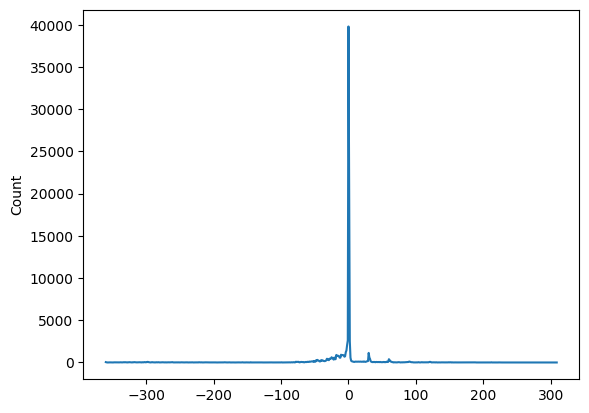

In [119]:
x = diff['diff_duration']
y = diff['ID'] 

plt.plot(x, y)

#plt.xlabel('Customer type')
plt.ylabel('Count')
#plt.title('Costs per customer type')
#plt.xticks(rotation=60)
plt.show()